Exploratory Data Analysis (EDA) on Telecommunications Data

In [1]:
# from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
# import sys
os.chdir('..')
import sqlalchemy

Data Extraction

In [2]:

from scripts.dbconnection import test_connection
test_connection

<function scripts.dbconnection.test_connection()>

Extract telecommunications data from the XDR_data table

In [3]:
# xdr_data = get_dataFrame_from_database()
from scripts.dbconnection import get_engine
engine = get_engine()


In [4]:
from sqlalchemy import create_engine

In [5]:
query = "SELECT * FROM xdr_data;"
xdr_data = pd.read_sql(query, con=engine)
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
xdr_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


Check datatype of extracted dataset

In [7]:
dataType_of_Dataset=xdr_data.dtypes
dataType_of_Dataset.head(dataType_of_Dataset.size)

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

Number of rows and columns

In [8]:
print("Rows=", xdr_data.shape[0], "Columns=", xdr_data.shape[1])

Rows= 150001 Columns= 55


Find any missing values

In [9]:
from scripts.data_cleaning import find_missing_values
missing_summary = find_missing_values(xdr_data)
missing_summary.head(missing_summary.size)

From 55 columns selected, there are 41 columns with missing values.


,Missing values,Percent of Total Values,DataType
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


Replace missing value with appropriate method

In [10]:
from scripts.data_cleaning import replace_missing_values
xdr_data=replace_missing_values(xdr_data)

d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\data_cleaning.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy[column].fillna(column_mean, inplace=True)
d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\data_cleaning.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Check replaced missing values

In [11]:
find_missing_values(xdr_data)

From 55 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


DataSet after replaced missing value

In [12]:
xdr_data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [13]:
xdr_data['Dur. (ms).1']

0         1.823653e+09
1         1.365104e+09
2         1.361763e+09
3         1.321510e+09
4         1.089009e+09
              ...     
149996    8.123076e+07
149997    9.797070e+07
149998    9.824953e+07
149999    9.791063e+07
150000    1.046091e+08
Name: Dur. (ms).1, Length: 150001, dtype: float64

In [14]:
xdr_data['Dur. (ms)']

0         1.823652e+06
1         1.365104e+06
2         1.361762e+06
3         1.321509e+06
4         1.089009e+06
              ...     
149996    8.123000e+04
149997    9.797000e+04
149998    9.824900e+04
149999    9.791000e+04
150000    1.046086e+05
Name: Dur. (ms), Length: 150001, dtype: float64

Convert Byte into MB

In [15]:
from scripts.data_transform import convertByteIntoMegaByte
xdr_data=convertByteIntoMegaByte(xdr_data)

In [16]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+13,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+08,33664.962239,3.552121e+07,9.16456699548519E+015,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1.311448e+13,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+08,33681.854413,3.579401e+07,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,1.311448e+13,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+08,33760.627129,3.528151e+07,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+13,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+08,33750.343200,3.535661e+07,T21824A,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,1.311448e+13,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+08,33699.795932,3.540701e+07,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


Find  Outliers

In [17]:
from scripts.data_cleaning import get_outlier_summary
outlier_summary=get_outlier_summary(xdr_data)
outlier_summary.head(outlier_summary.size)

From 50 selected numerical columns, there are 31 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,0
1,Start ms,0
2,End ms,0
3,Dur. (ms),7184
4,IMSI,13250
5,MSISDN/Number,24742
6,IMEI,0
7,Avg RTT DL (ms),7718
8,Avg RTT UL (ms),8975
9,Avg Bearer TP DL (kbps),13235


Box Plot before remove outlier

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


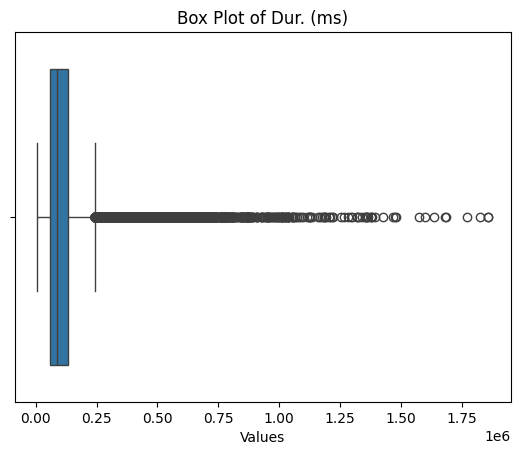

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


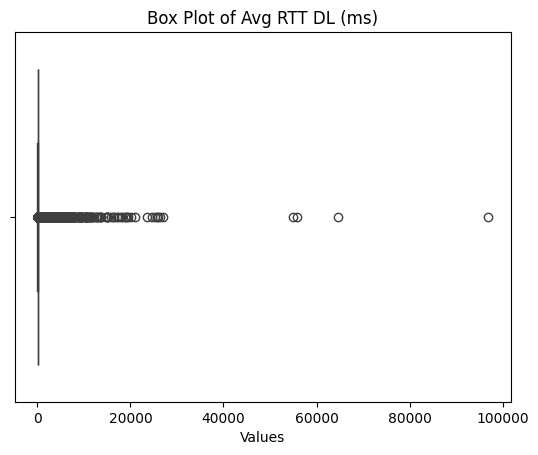

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


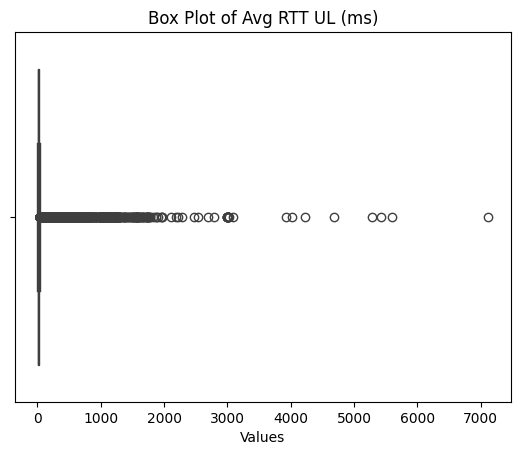

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


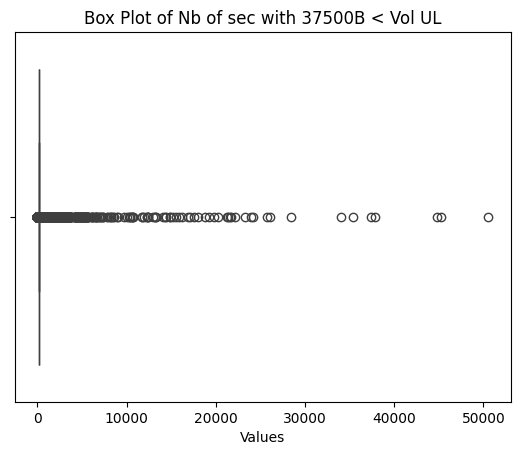

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


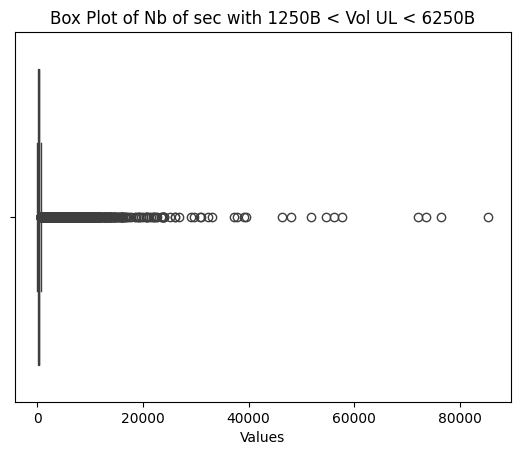

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


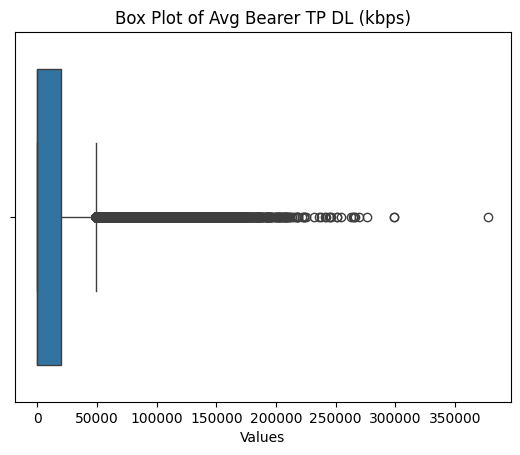

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


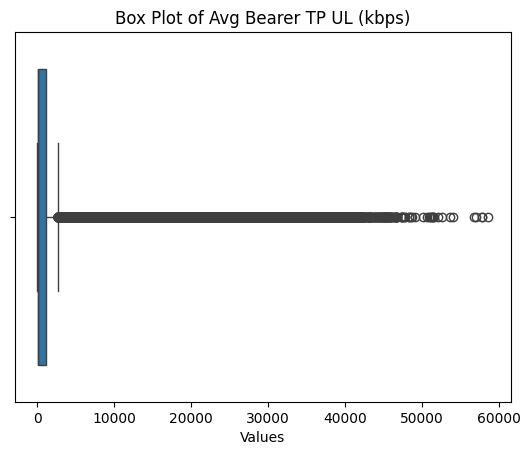

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


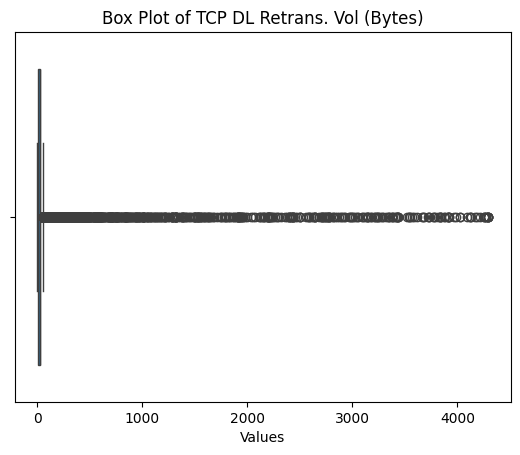

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


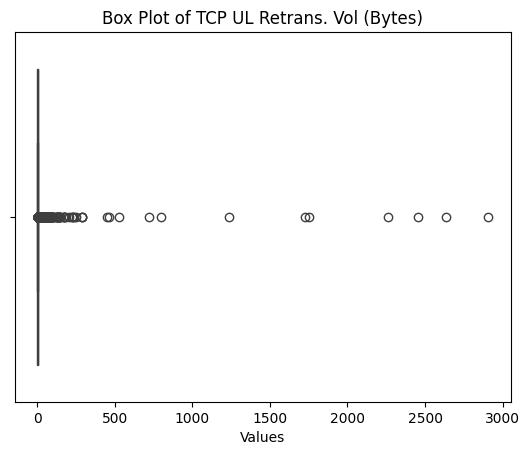

In [18]:
from scripts.data_cleaning import getBoxPlotToCheckOutlier
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 37500B < Vol UL','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])


Remove outliers

In [19]:
from scripts.data_cleaning import remove_outliers_winsorization
# Remove outliers using winsorization
xdr_data=remove_outliers_winsorization(xdr_data)


In [20]:
get_outlier_summary(xdr_data)

From 50 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,0
1,Start ms,0
2,End ms,0
3,Dur. (ms),0
4,IMSI,0
5,MSISDN/Number,0
6,IMEI,0
7,Avg RTT DL (ms),0
8,Avg RTT UL (ms),0
9,Avg Bearer TP DL (kbps),0


Box Plot After remove Outlier

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


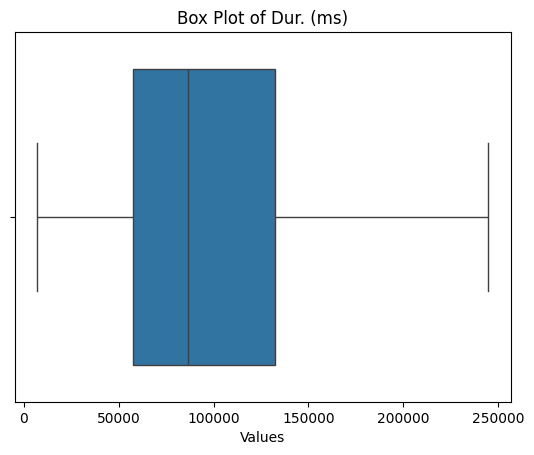

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


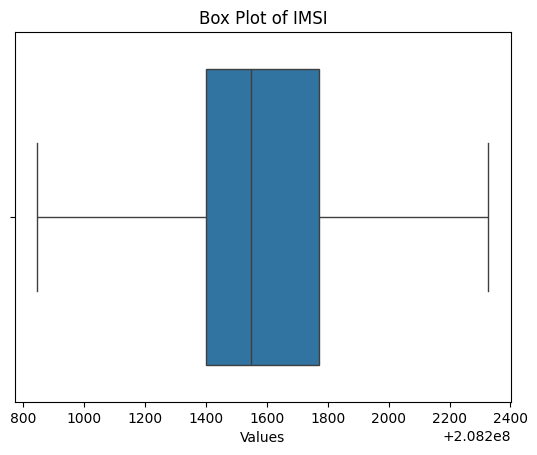

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


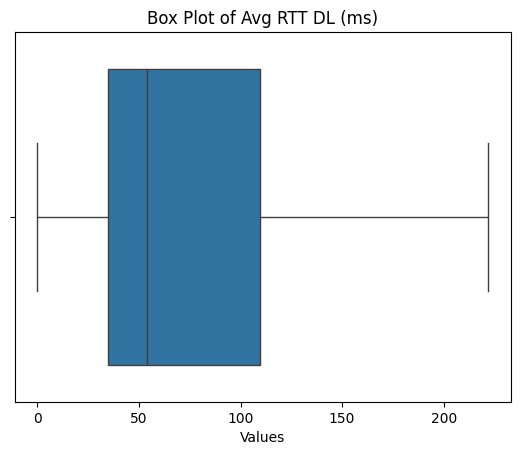

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


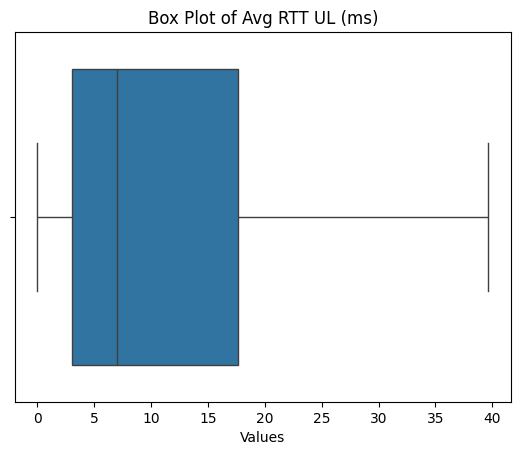

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


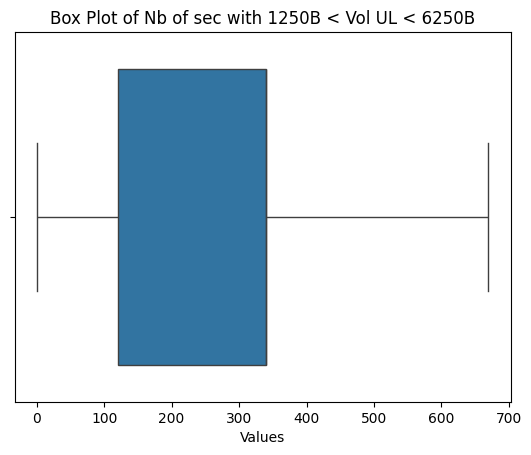

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


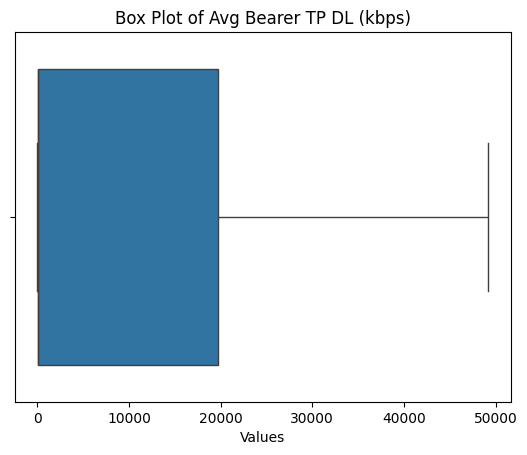

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


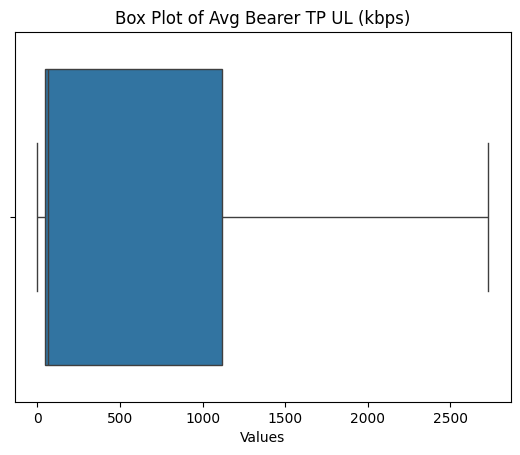

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


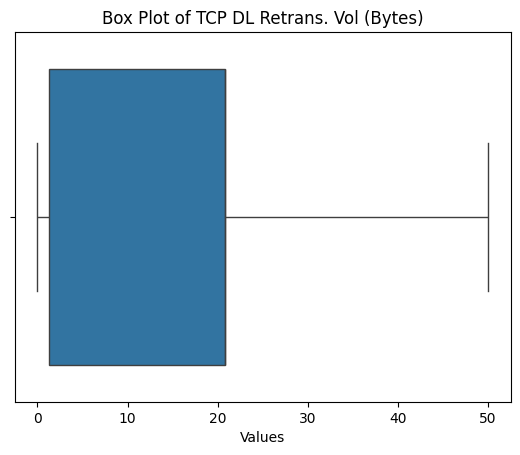

d:\week2\TellCo-Telecom-Analysis-Week-2\.week2\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


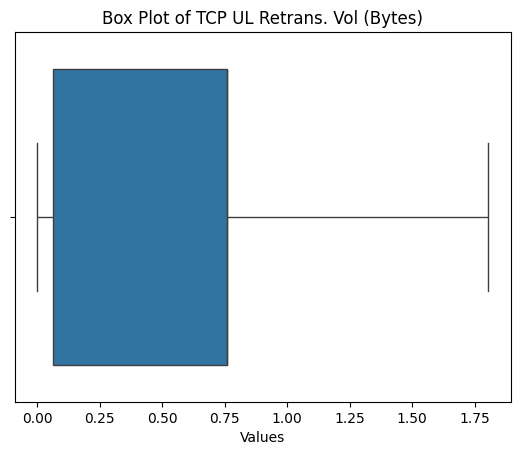

In [21]:
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','IMSI','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])


User Overview analysis

User Device Analysis

In [22]:
top_handsets = xdr_data['Handset Type'].value_counts().head(10)
top_manufacturers = xdr_data['Handset Manufacturer'].value_counts().head(3)

Top Ten handset types

In [23]:
print(top_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


<Axes: xlabel='Handset Type'>

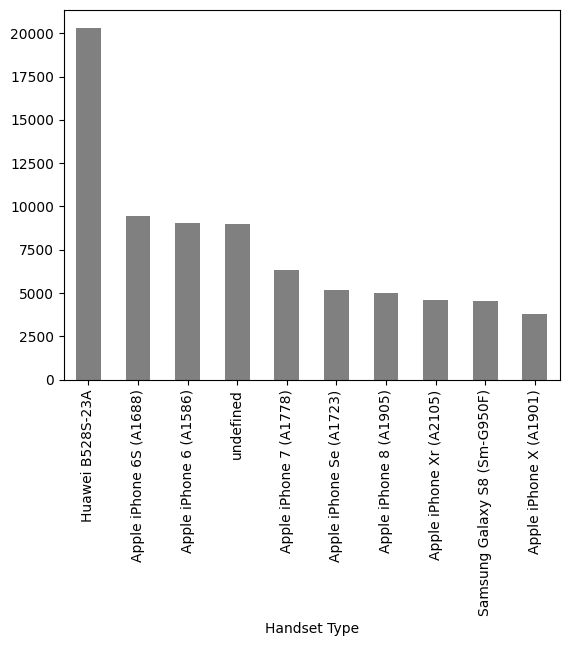

In [24]:
top_handsets.plot(kind='bar',color='grey')

In [25]:
print("Rows=", xdr_data.shape[0], "Columns=", xdr_data.shape[1])

Rows= 150001 Columns= 55


Top three handset manufacturers

In [26]:
top_manufacturers.head()

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64

<Axes: xlabel='Handset Manufacturer'>

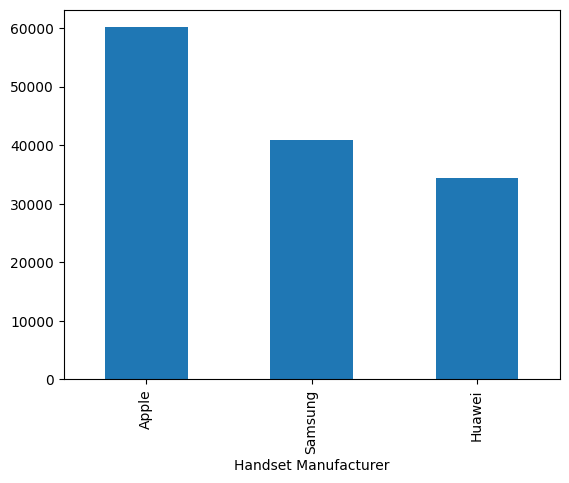

In [27]:
top_manufacturers.plot(kind='bar')

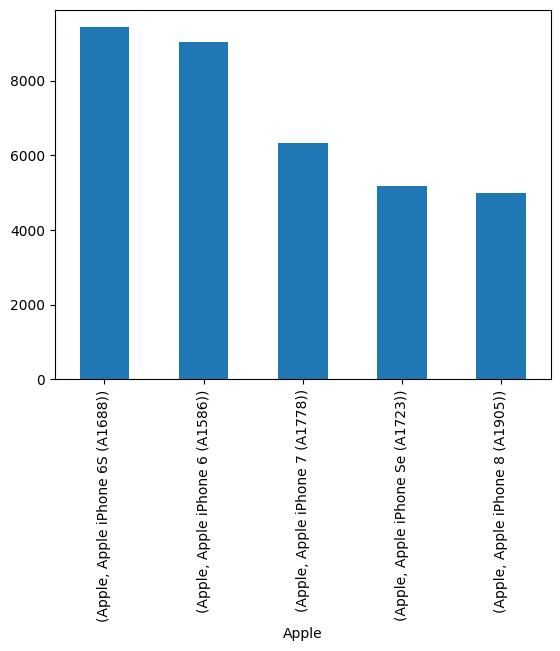

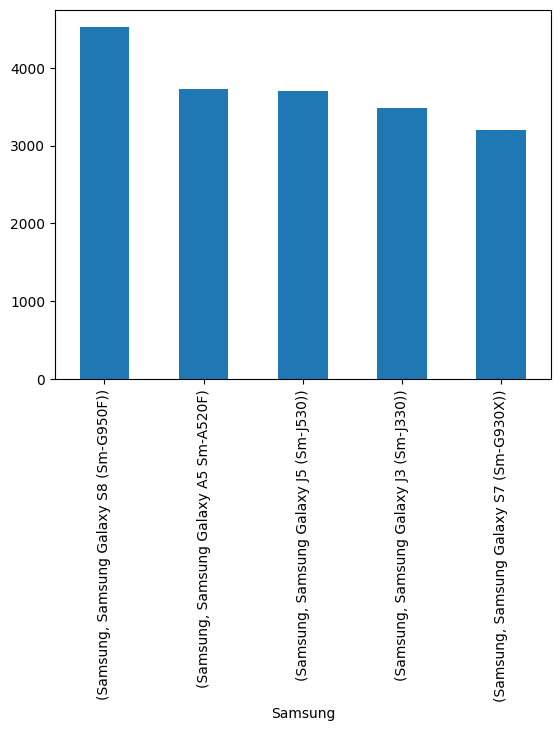

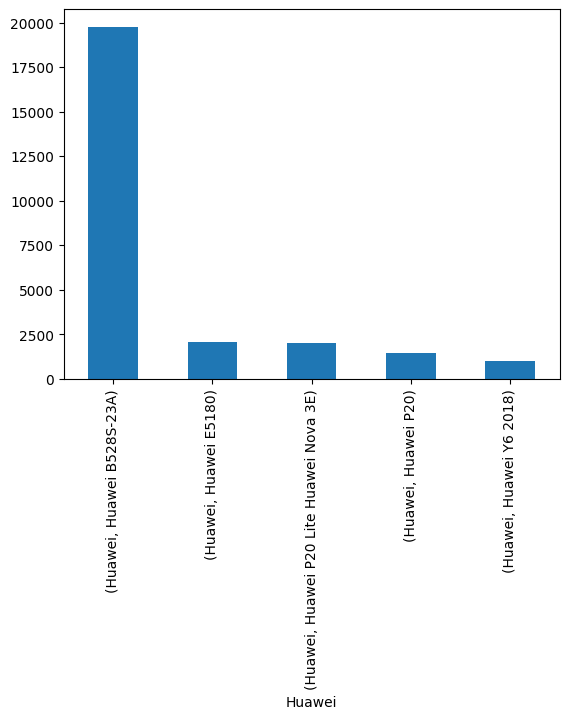

In [28]:
filtered_data = xdr_data[xdr_data['Handset Manufacturer'].isin(top_manufacturers.index)]

for h_manufacturer in top_manufacturers.index:
    top_5_handsets_per_manufacturer = filtered_data[filtered_data['Handset Manufacturer']==h_manufacturer].groupby('Handset Manufacturer')['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer.plot(kind='bar')
    plt.xlabel(h_manufacturer)
    plt.show()

In [29]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+13,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,2.082014e+08,33664.962239,3.552121e+07,9.16456699548519E+015,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1.311448e+13,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,2.082019e+08,33681.854413,3.579401e+07,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,1.311448e+13,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,2.082008e+08,33734.564203,3.528151e+07,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+13,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,2.082014e+08,33734.564203,3.535661e+07,T21824A,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,1.311448e+13,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,2.082014e+08,33699.795932,3.540701e+07,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


Aggregate Each Application per User

In [30]:
from scripts.telecom_analysis import aggregate_xdr_data
aggregated_xdr_data=aggregate_xdr_data(xdr_data)
aggregated_xdr_data.head(10)

d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\telecom_analysis.py:29: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_df = df.groupby('MSISDN/Number').agg(


,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Session_Duration,Total_xDR_Sessions
MSISDN/Number,,,,,,,,,,
33601.675527,182951.226284,665.487661,4923.336797,818.423801,818.423801,8047.787282,159718.700372,158876.532710,34112179.0,3.603373e+15
33601.712373,339.616950,0.602474,22.361212,2.835412,2.835412,12.478941,283.095310,786.175881,38503.0,1.311448e+13
33601.712551,900.610946,3.036290,9.613563,3.596083,3.596083,16.951885,839.795046,682.485438,52478.0,6.917538e+12
33601.713789,1587.337140,4.208402,26.033981,3.285166,3.285166,59.761378,1423.399118,1326.388626,120298.0,1.462771e+13
33601.714799,178.330679,2.489630,14.319698,3.264827,3.264827,24.873000,110.287002,82.594113,176022.0,1.311448e+13
33601.717042,334.691441,0.107064,6.820104,1.872526,1.872526,23.238525,288.996494,332.167601,127918.0,7.349883e+12
33601.718622,1315.473749,5.759823,33.188094,5.832060,5.832060,36.788932,1159.205986,1123.033280,82590.0,1.462771e+13
33601.719194,1335.339310,2.262100,31.151078,5.984782,5.984782,50.726318,1200.017097,237.557823,176459.0,1.462771e+13
33601.720129,437.461975,2.785677,2.586786,0.774081,0.774081,22.863972,380.052268,250.215756,86780.0,1.311448e+13


(EDA) on Aggregated Data

In [31]:
aggregated_xdr_data.describe()

,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Session_Duration,Total_xDR_Sessions
count,9.003800e+04,90038.000000,90038.000000,90038.000000,90038.000000,90038.000000,9.003800e+04,9.003800e+04,9.003800e+04,9.003800e+04
mean,8.259312e+02,3.045818,23.388865,3.763607,3.763607,37.698678,7.169239e+02,7.153117e+02,1.658846e+05,1.689111e+13
std,4.007920e+04,148.931722,1138.542409,184.112576,184.112576,1843.867901,3.474940e+04,3.501087e+04,8.112136e+06,8.251139e+14
min,3.324901e+01,0.001563,0.023708,0.018176,0.018176,0.184569,3.063580e-01,5.117690e-01,7.146000e+03,6.917538e+12
25%,3.585559e+02,1.210091,11.381826,1.672597,1.672597,18.564679,2.881509e+02,2.849859e+02,7.007000e+04,7.349883e+12
50%,6.183490e+02,2.300906,16.708112,2.793700,2.793700,26.700729,5.429110e+02,5.385891e+02,1.020740e+05,1.304243e+13
75%,8.569936e+02,3.304691,23.536615,3.842333,3.842333,37.903925,7.772646e+02,7.744172e+02,1.727990e+05,1.462771e+13
max,1.202471e+07,44682.944435,341596.376924,55238.582358,55238.582358,553214.085775,1.042554e+07,1.050403e+07,2.433741e+09,2.475544e+17


Variable Transformations

Segment the users into the top five decile classes and Calculate Total Data per Decile Class

In [32]:
from scripts.telecom_analysis import segment_users_and_calculate_total_data
total_data_per_decile = segment_users_and_calculate_total_data(xdr_data)
print(total_data_per_decile)

d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\telecom_analysis.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = data.groupby('decile_class')['Total_DL_+_UL'].sum()


decile_class
Decile 1    1.488405e+07
Decile 2    2.361998e+07
Decile 3    6.089086e+06
Decile 4    1.485374e+07
Decile 5    1.491834e+07
Name: Total_DL_+_UL, dtype: float64


Graphical Representation of Total Dl and Ul with in Decile

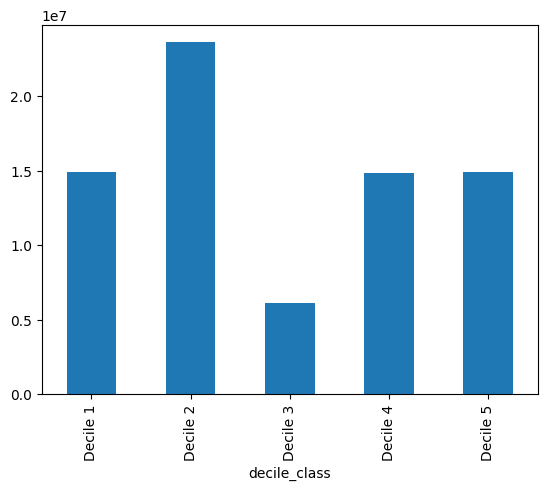

In [33]:
total_data_per_decile.plot(kind='bar')
plt.show()

In [34]:
xdr_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL
count,1.500010e+05,150001.000000,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,150001.000000,150001.000000,150001.000000,...,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,1.013887e+13,499.188200,498.800880,99572.128983,2.082015e+08,33669.992180,4.847455e+07,72.862020,12.037797,11112.355328,...,11.009410,11.626852,11.001755,422.044703,8.288398,421.100544,8.264799,41.121201,454.643430,495.764631
std,2.883600e+12,288.610872,288.096693,59084.184127,3.925668e+02,35.325893,2.237359e+07,51.361714,11.040917,17189.349903,...,6.345423,6.725218,6.359490,243.967494,4.782700,243.205010,4.769004,11.269234,244.142061,244.380618
min,6.917538e+12,0.000000,0.000000,7142.000000,2.082008e+08,33601.675527,4.400152e+05,0.000000,0.000000,0.000000,...,0.000105,0.000042,0.000035,0.002516,0.000059,0.003290,0.000148,9.503715,7.114041,28.956107
25%,7.349883e+12,250.000000,251.000000,57442.000000,2.082014e+08,33651.508781,3.546261e+07,35.000000,3.000000,43.000000,...,5.517965,5.777156,5.475981,210.473253,4.128476,210.186872,4.145943,33.222029,243.107173,284.476442
50%,7.349883e+12,499.000000,500.000000,86399.000000,2.082015e+08,33663.797508,3.572241e+07,54.000000,7.000000,63.000000,...,11.013447,11.642217,10.996384,423.408104,8.291208,421.803006,8.267071,41.143242,455.840911,496.896342
75%,1.304243e+13,749.000000,750.000000,132430.000000,2.082018e+08,33684.730950,8.611970e+07,109.795706,17.662883,19710.000000,...,16.515562,17.470478,16.507268,633.174167,12.431624,631.691786,12.384148,49.034238,665.705138,706.500344
max,1.318654e+13,999.000000,999.000000,244912.000000,2.082023e+08,33734.564203,9.900120e+07,221.989265,39.657207,49210.500000,...,22.011962,23.259189,22.011955,843.441889,16.558794,843.442489,16.558816,72.752552,902.969616,953.624448


Non-Graphical 
Univariate Analysis: Dispersion Parameters

In [35]:
from scripts.telecom_analysis import compute_dispersion_parameters
dispersion_results = compute_dispersion_parameters(xdr_data)

d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\telecom_analysis.py:89: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\telecom_analysis.py:89: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
d:\week2\TellCo-Telecom-Analysis-Week-2\scripts\telecom_analysis.py:89: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()


In [36]:
dispersion_results.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL
Range,6269003648590.668945,999.0,999.0,237770.0,1481.369432,132.888676,98561186.125774,221.989265,39.657207,49210.5,...,22.011857,23.259147,22.01192,843.439373,16.558735,843.439199,16.558668,63.248836,895.855575,924.668341
Variance,8315146431338349603061760.0,83296.235554,82999.704445,3490940814.010637,154108.666074,1247.918721,500577558786728.8125,2638.025639,121.901858,295473750.078073,...,40.264398,45.228558,40.44311,59520.138298,22.874216,59148.676796,22.743396,126.995624,59605.345737,59721.88643
Std Dev,2883599561544.277344,288.610872,288.096693,59084.184127,392.566766,35.325893,22373590.654759,51.361714,11.040917,17189.349903,...,6.345423,6.725218,6.35949,243.967494,4.7827,243.20501,4.769004,11.269234,244.142061,244.380618
IQR,5692542731480.580078,499.0,499.0,74988.0,370.342358,33.222169,50657094.738467,74.795706,14.662883,19667.0,...,10.997597,11.693322,11.031287,422.700914,8.303148,421.504914,8.238205,15.812209,422.597965,422.023902
Coef Var,0.28441,0.57816,0.577579,0.593381,0.000002,0.001049,0.461553,0.704918,0.917188,1.546868,...,0.576364,0.578421,0.578043,0.578061,0.577035,0.577546,0.577026,0.274049,0.536997,0.492937


Graphical Univariate Analysis

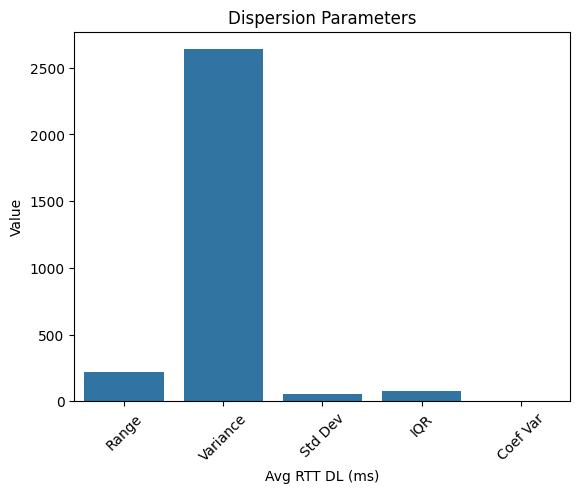

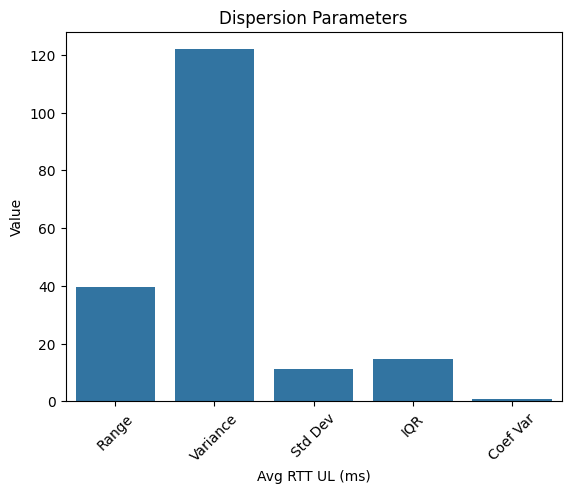

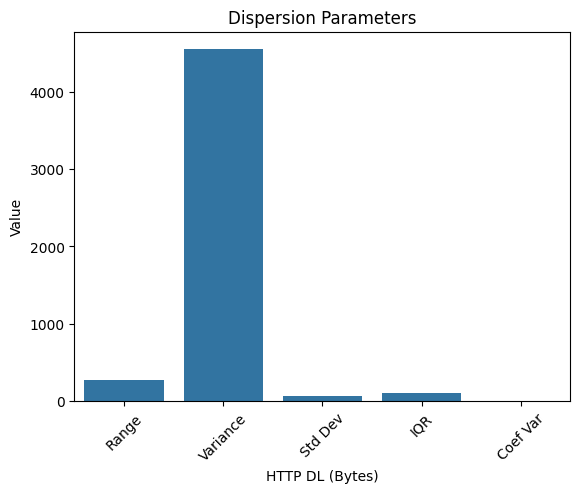

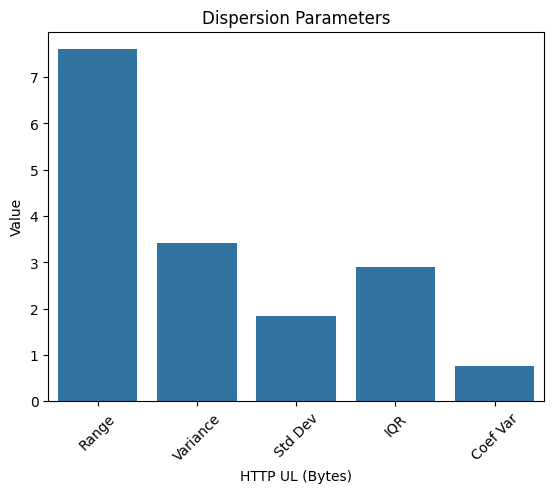

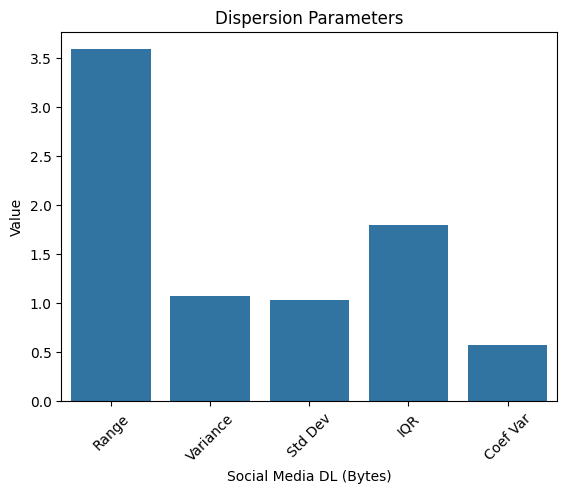

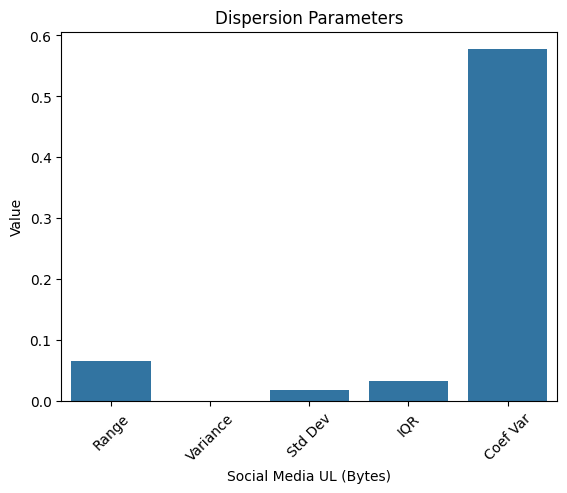

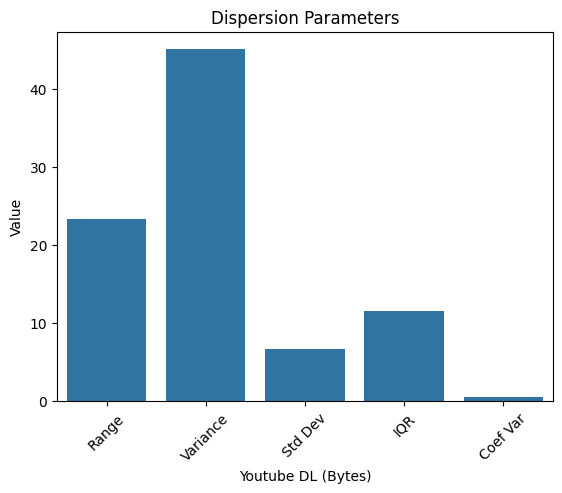

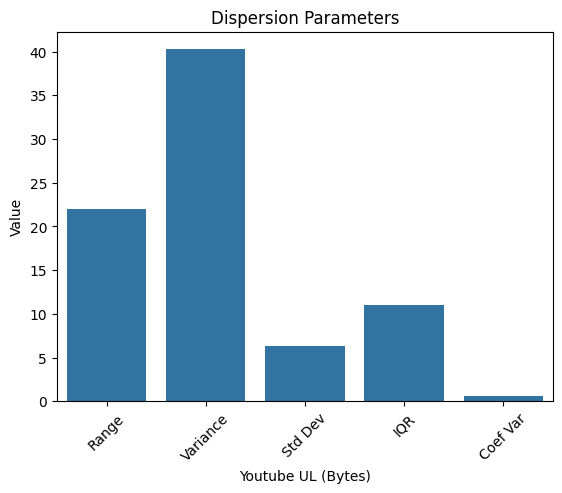

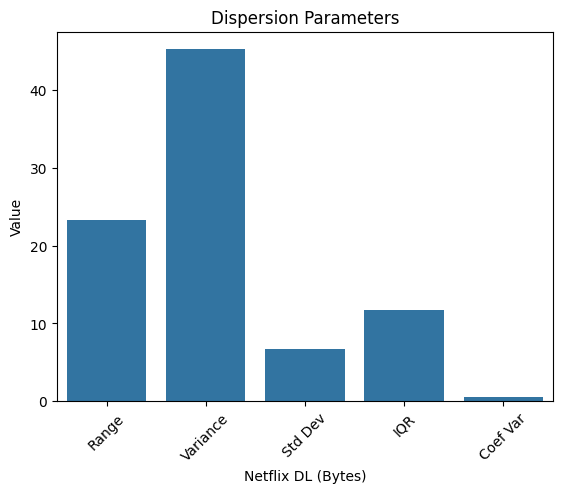

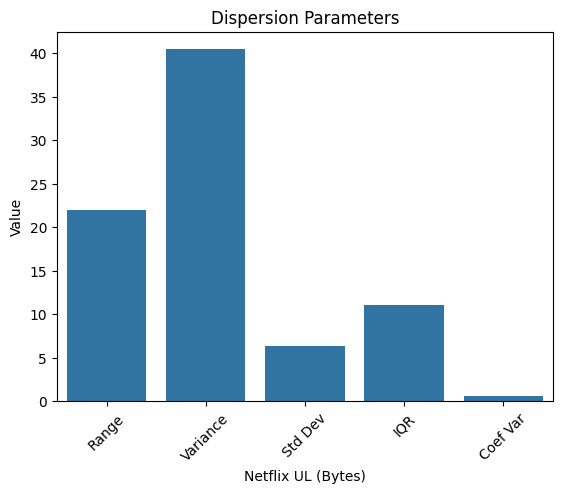

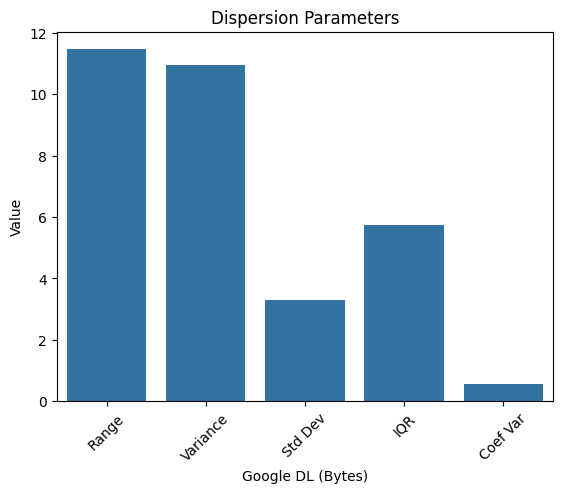

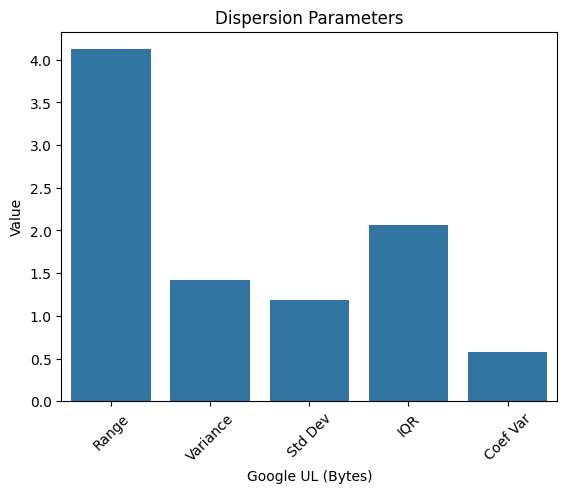

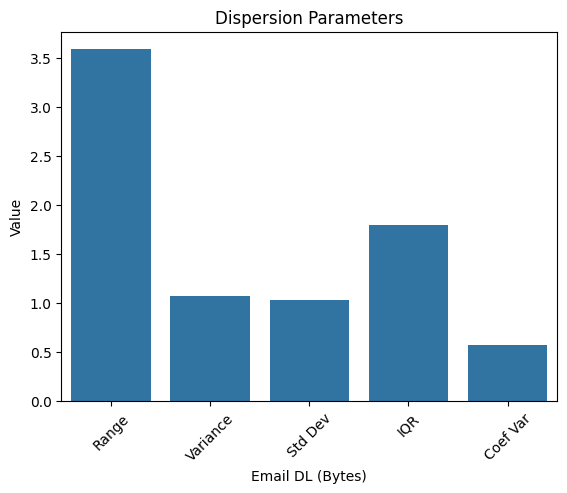

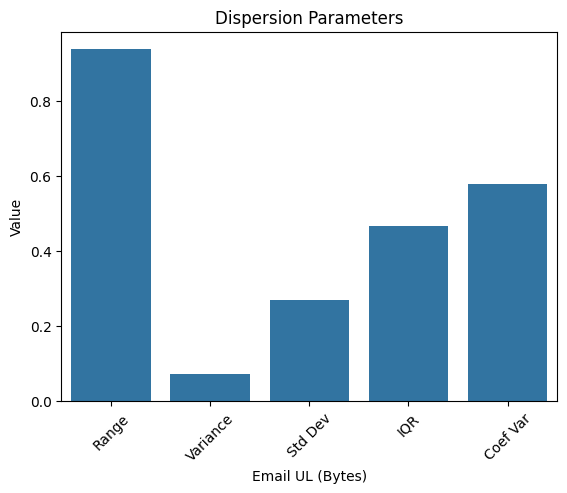

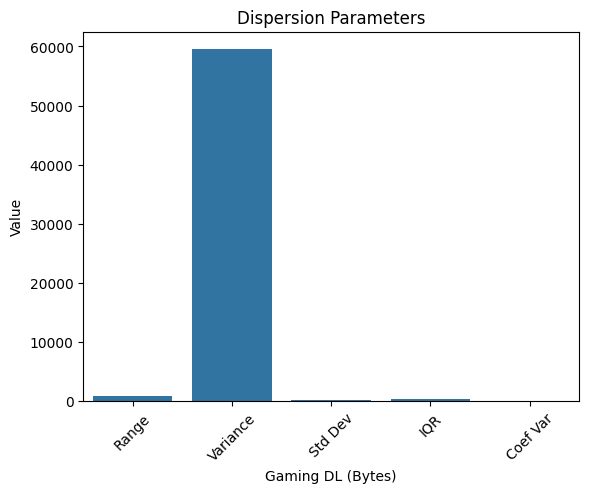

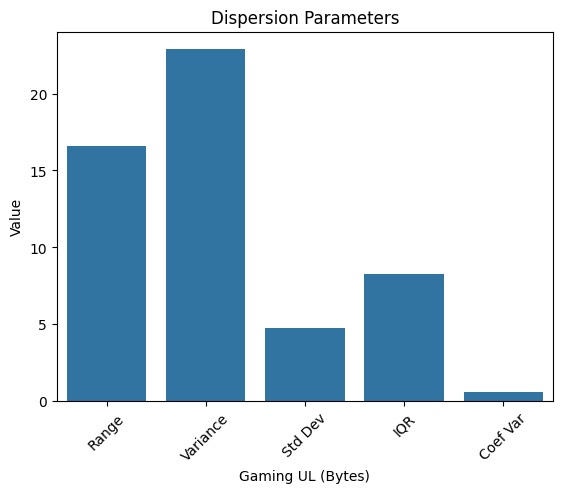

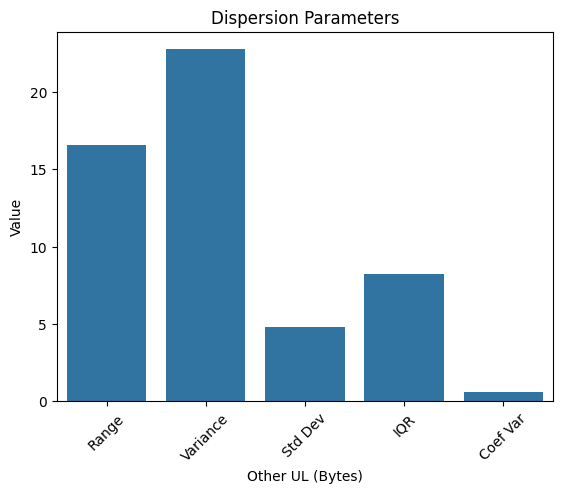

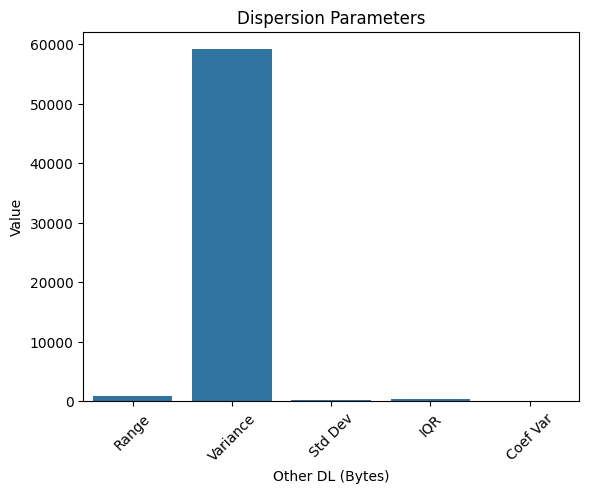

In [37]:
from scripts.telecom_analysis import plot_dispersion_parameters
plot_dispersion_parameters(dispersion_results,['Avg RTT DL (ms)','Avg RTT UL (ms)','HTTP DL (Bytes)','HTTP UL (Bytes)','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 'Other DL (Bytes)'])


Bivariate Analysis
Relationship Between Each Application and Total Data DL and UL

In [38]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class
0,1.311448e+13,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,2.082014e+08,33664.962239,3.552121e+07,9.16456699548519E+015,...,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636,345.629377,Decile 5
1,1.311448e+13,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,2.082019e+08,33681.854413,3.579401e+07,L77566A,...,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965,707.185356,Decile 5
2,1.311448e+13,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,2.082008e+08,33734.564203,3.528151e+07,D42335A,...,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335,307.690973,Decile 5
3,1.311448e+13,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,2.082014e+08,33734.564203,3.535661e+07,T21824A,...,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530,889.352748,Decile 5
4,1.311448e+13,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,2.082014e+08,33699.795932,3.540701e+07,D88865A,...,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589,607.681403,Decile 5


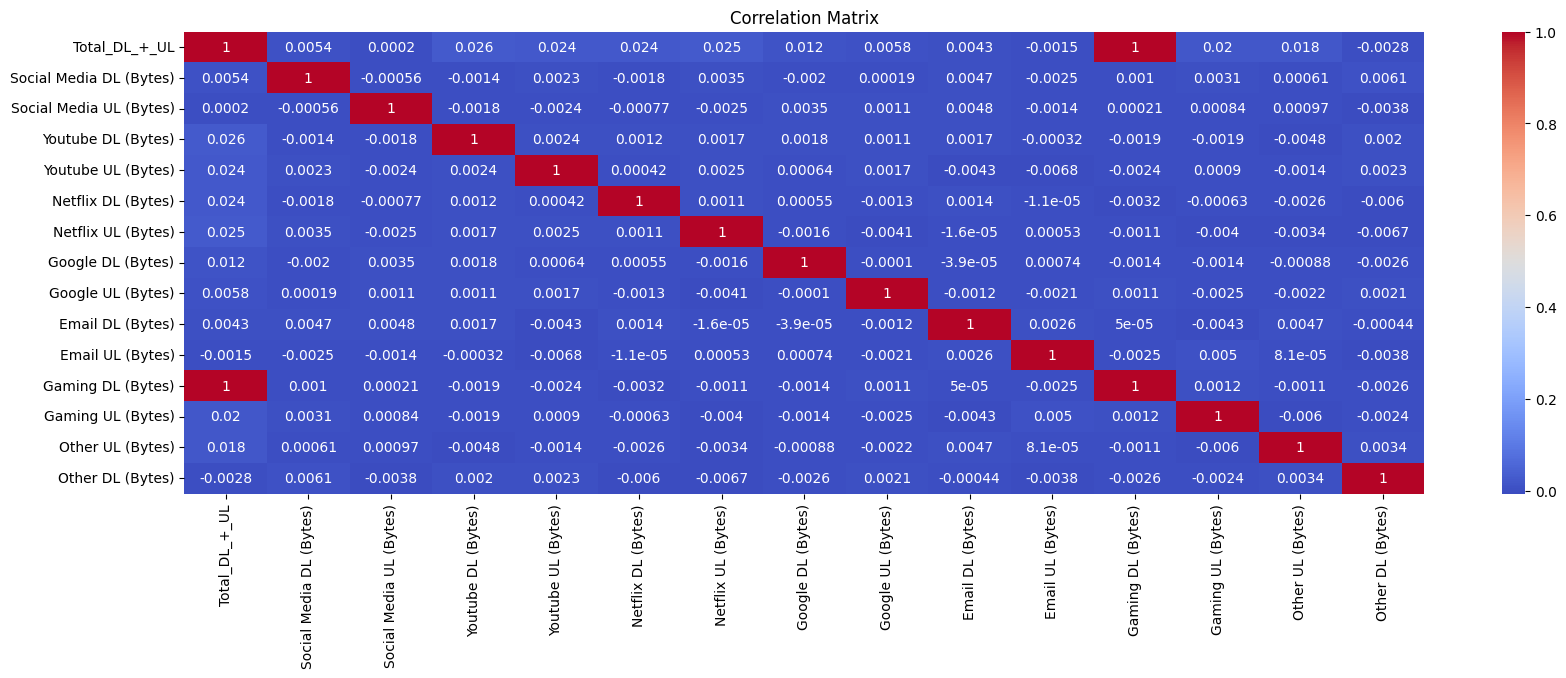

In [39]:
correlation_matrix = xdr_data[['Total_DL_+_UL','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 'Other DL (Bytes)']].corr()
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


Correlation Analysis
Computing a Correlation Matrix for Each Application

In [40]:
from scripts.telecom_analysis import correlationBetweenApplication
applicationData=correlationBetweenApplication(xdr_data)

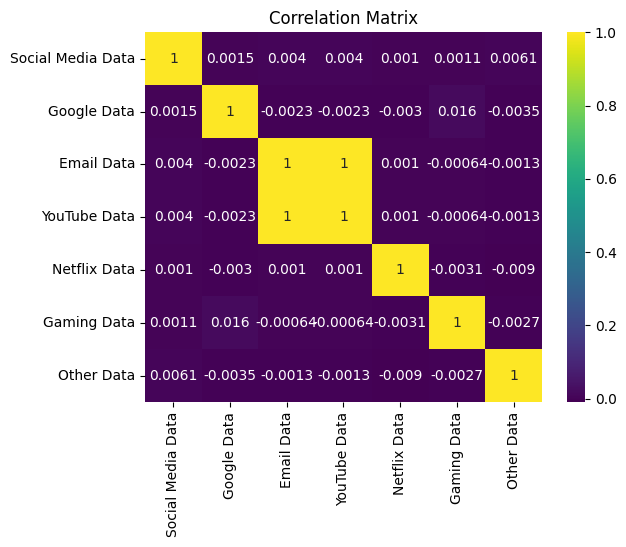

In [41]:
correlation_matrix = applicationData[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

Principal Component Analysis (PCA) for Dimensionality Reduction

In [42]:

from sklearn.decomposition import PCA


# Select only the desired columns
data_selected = applicationData[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']]

data_standardized = (data_selected - data_selected.mean()) / data_selected.std()

# Perform PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(data_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, xdr_data], axis=1)


In [43]:
principal_df.head(10)

,PC1,PC2
0,1.903229,0.067314
1,-1.738618,-0.904089
2,1.461045,-1.183910
3,-0.263278,1.653893
4,-0.201224,-0.250238
5,0.847247,2.031420
6,-0.224168,-1.209967
7,1.641102,1.405646
8,1.471625,1.279439
9,-1.970841,0.979452


In [44]:
final_df.head()

,PC1,PC2,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class
0,1.903229,0.067314,1.311448e+13,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,2.082014e+08,33664.962239,...,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636,345.629377,Decile 5
1,-1.738618,-0.904089,1.311448e+13,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,2.082019e+08,33681.854413,...,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965,707.185356,Decile 5
2,1.461045,-1.183910,1.311448e+13,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,2.082008e+08,33734.564203,...,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335,307.690973,Decile 5
3,-0.263278,1.653893,1.311448e+13,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,2.082014e+08,33734.564203,...,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530,889.352748,Decile 5
4,-0.201224,-0.250238,1.311448e+13,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,2.082014e+08,33699.795932,...,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589,607.681403,Decile 5
